# Chronic Kidney Disease
Data has 25 features which may predict a patient with chronic kidney disease

## Index

1. Data Description
2. Used Python Libraries
3. Know Dataset Nature
4. Exploratory data analysis (EDA)
5. Data Preprocessing
6. Data Normalization
7. Feature Selection
8. Feature engineering
9. Model Buliding
10. Receiver Operating Characteristic Curve (ROC AUC)
11. conclusion

## Data Description:

We use the following representation to collect the dataset

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. class - class

## Used Python Libraries

In [82]:
import helpers as h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# 1) Data Processing

In [83]:
df = h.import_dataset()

# Analyze dataset nature

In [84]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [85]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [88]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Exploratory data analysis (EDA)

1) For numeric data

       Made histograms to understand distributions
       Corrplot
       Pivot table comparing survival rate across numeric variables
2) For Categorical Data

       Made bar charts to understand balance of classes
       Made pivot tables to understand relationship with survival

In [76]:
data_num = df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']]
data_cat = df[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [77]:
filna = df[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']]


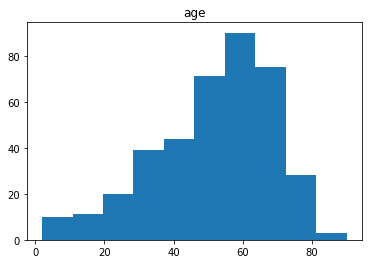

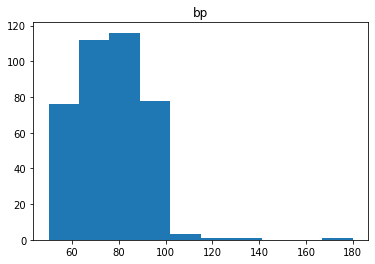

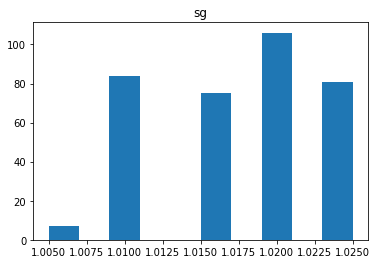

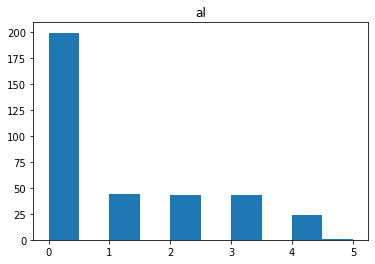

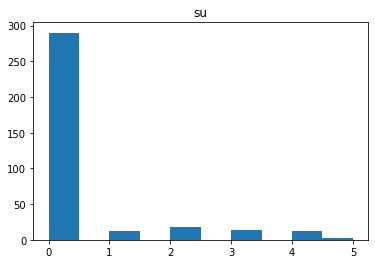

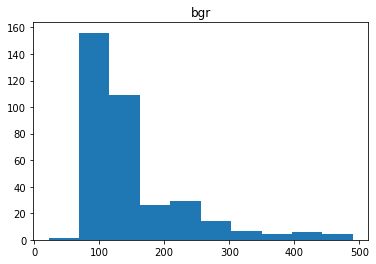

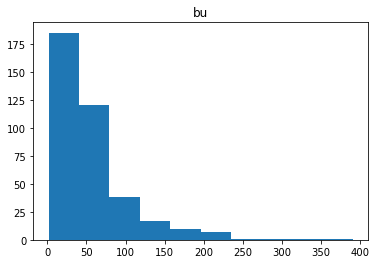

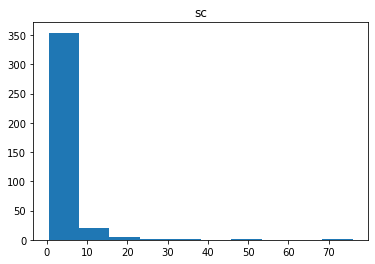

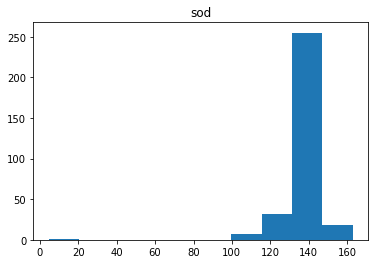

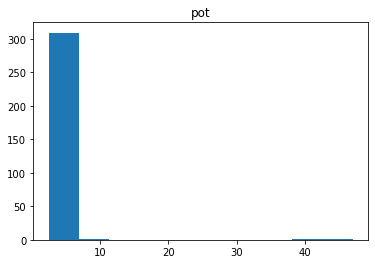

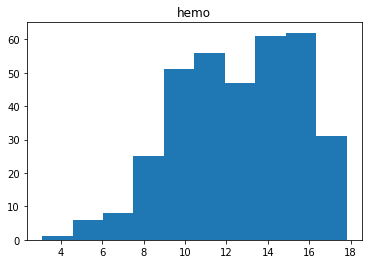

In [89]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992  0.196985   
bp    0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193  0.188517   
sg   -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710 -0.314295   
al    0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464  0.453528   
su    0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827  0.168583   
bgr   0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000  0.143322   
bu    0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322  1.000000   
sc    0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875  0.586368   
sod  -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848 -0.323054   
pot   0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966  0.357049   
hemo -0.192928 -0.306540  0.602582 -0.634632 -0.224775 -0.306189 -0.610360   

            sc       sod       pot      hemo  
age   0.132531 -

<AxesSubplot:>

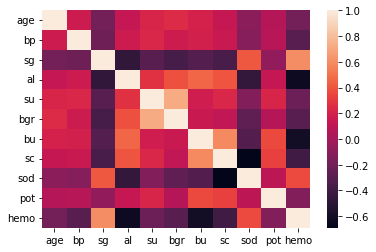

In [90]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [91]:
data = h.clean_data(df)
print(data.head())
print("=="*50)

# # Remove ground-truth
# target = data["classification"]
# target = pd.get_dummies(target, drop_first=True)
# data = data.drop(columns="classification")
# print("data")
# print(data.head())
# print("=="*20)

data = h.normalize_data(data)
print(data.head())


    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

          bgr  ...   pcv      wc        rc  htn   dm  cad  appet   pe  ane  \
0  121.000000  ...  44.0  7800.0  5.200000  yes  yes   no   good   no   no   
1  148.036517  ...  38.0  6000.0  4.707435   no   no   no   good   no   no   
2  423.000000  ...  31.0  7500.0  4.707435   no  yes   no   poor   no  yes   
3  117.000000  ...  32.0  6700.0  3.900000  yes   no   no   poor  yes  yes   
4  106.000000  ...  35.0  7300.0  4.600000   no   no   no   good   no   no   

  classification  
0            ckd  
1            ckd  
2            ckd 

C:\Users\ptodoran\BigData\1 IE\helpers.py:50: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [46]:
df = h.import_dataset()

In [51]:
# some  cleaning is required to remove the \t characters from couple of columns replacing the instances with the standard formating 
# classification, cad,  dm
df['classification'] = df['classification'].replace("ckd\t","ckd")
df['cad'] = df['cad'].replace("\tno","no")
df['dm'] = df['dm'].replace("\tno","no")
df['dm'] = df['dm'].replace("\tyes", "yes")
df['dm'] = df['dm'].replace(" yes", "yes")

num_cols = df.select_dtypes(include=['float64']).columns.values.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.values.tolist()

print("Some basic statistics....")
df.describe()


Some basic statistics....


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [53]:
# % Number of missing observations 
missing_values = df.isnull().sum()
missing_count_pct = ((missing_values / df.index.size) * 100)
print(missing_count_pct)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


In [65]:
from sklearn.impute import SimpleImputer
X_sim = df.copy()
impute = SimpleImputer(strategy='mean')

for col in list(X_sim.columns):
  if X_sim[col].dtype == 'object' :
    #Imputation by most frequent values for categorical features
    X_sim[col].fillna(X_sim[col].value_counts().index[0], inplace=True)

    #Imputation by mean values for continous features
  else : X_sim[col] = impute.fit_transform(X_sim[[col]])

X_sim.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
